In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
colour=sns.color_palette()
from sklearn.cross_validation import train_test_split


1. Consider the Boston Housing Price Dataset.


In [129]:
boston_df=pd.read_csv('D:\\Datascience\\datas\\boston_house_prices.csv')

In [130]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


2.)Find the correlation of features using a heatmap.

In [131]:
corr=boston_df.corr()

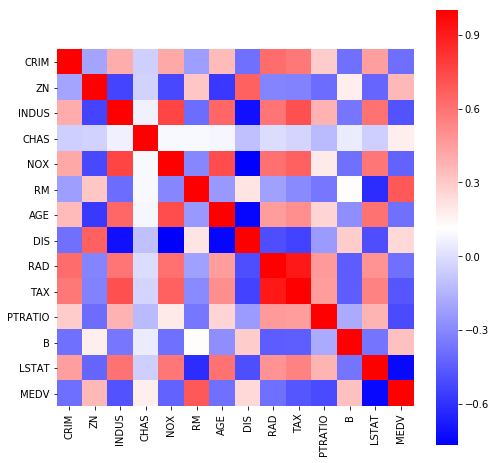

In [132]:
plt.figure(figsize=(8,8))
sns.heatmap(data=corr, square=True, cmap='bwr')

The Target variable-MEDV has a negative relation with (CRIM, INDUS, NOX, AGE, RAD, TAX, PTRATIO and LSTAT)
where LSTAT has a stronger than an other variables.
MEDV has a postive relation with (ZN and RM) RM has a comparitvely stronger relationship

2)feature normality-> parametric or non parametric test ->hypost

We have to check for the correlation which is already done above. now we have test if the above hyposthesis is true

3) Linear Regression from sklearn

In [133]:
boston_df.isnull().any()   #checking for null values

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [134]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [135]:
boston_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.593761,8.596783,0.00632,0.082045,0.25651,3.647422,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [136]:
#Outlier Analysis

In [137]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

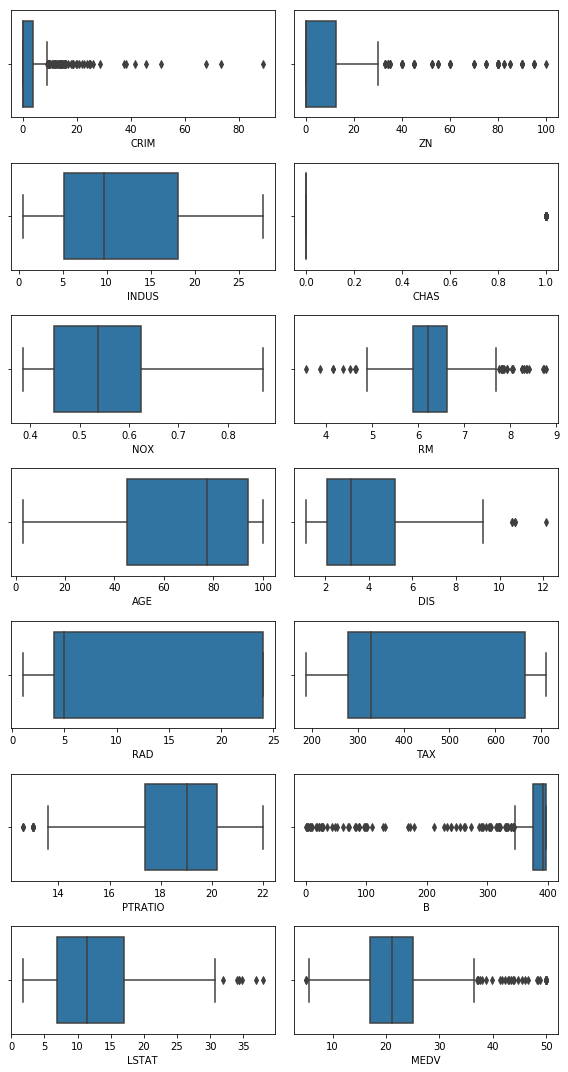

In [138]:
plt.figure(figsize=(8,15))
n=1
for col in boston_df.columns:
    plt.subplot(7,2,n)
    sns.boxplot(boston_df[col])
    plt.tight_layout()
    n=n+1
plt.show()

In [139]:
#splitting train and test sets

In [140]:
x=boston_df.drop('MEDV', axis=1)
y=boston_df['MEDV']

In [141]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=1)

In [142]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [143]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [144]:
model=linreg.fit(x_train,y_train)

In [145]:
y_pred=model.predict(x_test)

In [146]:
y_test.head()

307    28.2
343    23.9
47     16.6
67     22.0
362    20.8
Name: MEDV, dtype: float64

In [147]:
result=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
result.head(10)

,Actual,Predicted
307,28.2,32.651779
343,23.9,28.093170
47,16.6,18.028889
67,22.0,21.482092
362,20.8,18.824775
132,23.0,19.882239
292,27.9,32.419660
31,14.5,18.065770
218,21.5,24.428125
90,22.6,27.011916


In [148]:
result_summary=pd.DataFrame()
result_summary['columns']=x_train.columns
result_summary['lin_coef']=model.coef_
result_summary

,columns,lin_coef
0,CRIM,-0.111326
1,ZN,0.058028
2,INDUS,0.018760
3,CHAS,2.133237
4,NOX,-19.616384
5,RM,3.088113
6,AGE,0.004547
7,DIS,-1.500327
8,RAD,0.304868
9,TAX,-0.011116


In [127]:
x_train.columns

Index(['const', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [110]:
model.intercept_

42.97765028124431

In [111]:
#Lets check model accuracy

In [112]:
from sklearn import metrics

In [113]:
MSE=metrics.mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
print('Root Mean Square is', RMSE)

Root Mean Square is 4.834724710851498


In [114]:
R2_score=metrics.r2_score(y_test,y_pred)
R2_score

0.7634809220792311

In [115]:
residuals=(y_test-y_pred)

In [116]:
print(residuals[:5])

307   -4.451779
343   -4.193170
47    -1.428889
67     0.517908
362    1.975225
Name: MEDV, dtype: float64


4) Linear Regression using statsmodel


In [117]:
import statsmodels.api as sm

In [118]:
x_train=sm.add_constant(x_train)
lin_reg=sm.OLS(y_train,x_train).fit()

In [119]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     80.82
Date:                Sat, 09 Nov 2019   Prob (F-statistic):          5.79e-102
Time:                        13:09:28   Log-Likelihood:                -1196.4
No. Observations:                 404   AIC:                             2421.
Df Residuals:                     390   BIC:                             2477.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.9777      5.753      7.470      0.000      31.666      54.289
CRIM          -0.1113      0.034     -3.273      0.001      -0.178      -0.044
ZN             0.0580      0.016      3.594      0.000       0.026       0.090
INDUS          0.0188      0.068      0.277      0.782      -0.114       0.152
CHAS           2.1332      0.909      2.347      0.019       0.346       3.921
NOX          -19.6164      4.277     -4.586      0.000     -28.026     -11.207
RM             3.0881      0.479      6.448      0.000       2.147       4.030
AGE            0.0045      0.015      0.305      0.761      -0.025       0.034
DIS           -1.5003      0.229     -6.542      0.000      -1.951      -1.049
RAD            0.3049      0.078      3.911      0.000       0.152       0.458
TAX           -0.0111      0.004     -2.530      0.012      -0.020      -0.002
PTRATIO       -0.9901      0.149     -6.637      0.000      -1.283      -0.697
B              0.0074      0.003      2.464      0.014       0.002       0.013
LSTAT         -0.5456      0.057     -9.512      0.000      -0.658      -0.433
==============================================================================
Omnibus:                      162.367   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.477
Skew:                           1.688   Prob(JB):                    7.42e-171
Kurtosis:                       8.928   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

5.Using scikit-learn, verify atleast 2 assumptions in Linear Regression.

Text(0.5,1,'observed Vs Residuals')

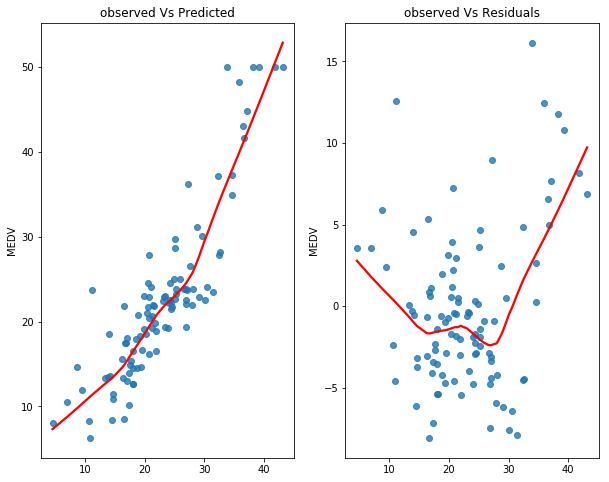

In [120]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.regplot(x=y_pred, y=y_test, lowess=True, line_kws={'color':'red'})
plt.title('observed Vs Predicted')

plt.subplot(1,2,2)
sns.regplot(x=y_pred, y=residuals, lowess=True, line_kws={'color':'red'})
plt.title('observed Vs Residuals')



from the above plot we can see that the linearity Assumption is not satisfied. 

In [121]:
#homoscedasticity check

In [122]:
pred=lin_reg.predict()

In [123]:
resi=lin_reg.resid

In [124]:
resi_standard=lin_reg.get_influence().resid_studentized_internal

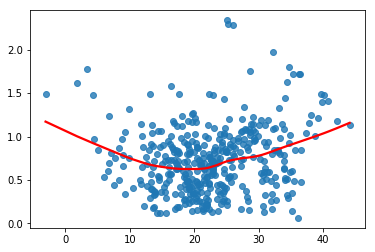

In [125]:
sns.regplot(x=pred, y=np.sqrt(np.abs(resi_standard)), lowess=True, line_kws={'color': 'red'})

the data does not follow homoscadasticity.because the residuals are not randomly distributed

Ridge Regression

In [153]:
from sklearn.linear_model import Ridge

In [183]:
ridge_reg=Ridge(alpha=0.5, random_state=0)
ridge_reg.fit(x_train,y_train)
ridge_pred=ridge_reg.predict(x_test)

In [181]:
MSE=np.mean((ridge_pred-y_test)**2)
MSE

23.300268137758426

In [182]:
Accuracy=ridge_reg.score(x_test,y_test)
Accuracy

0.7642326862648625

as compared to alpha values 0.05,0.5,1- 0.5 gives better accuracy

In [186]:
result_summary['ridge_coef']=ridge_reg.coef_
result_summary

,columns,lin_coef,ridge_coef
0,CRIM,-0.111326,-0.107983
1,ZN,0.058028,0.058386
2,INDUS,0.018760,-0.006241
3,CHAS,2.133237,2.017622
4,NOX,-19.616384,-13.966294
5,RM,3.088113,3.136952
6,AGE,0.004547,-0.000123
7,DIS,-1.500327,-1.416663
8,RAD,0.304868,0.292006
9,TAX,-0.011116,-0.011651


Lasso Regression

In [188]:
from sklearn.linear_model import Lasso

In [213]:
las_reg=Lasso(alpha=0.01, random_state=0)
las_reg.fit(x_train,y_train)
las_pred=las_reg.predict(x_test)

In [214]:
MSE=np.mean((las_pred-y_test)**2)
MSE

23.325558225601768

In [215]:
Accuracy=las_reg.score(x_test,y_test)
Accuracy

0.7639767846572201

As compared to the alpha values=: 0.05,0.5,1,0.01--0.01 give better accuracy  

In [217]:
result_summary['las_coef']=las_reg.coef_
result_summary

,columns,lin_coef,ridge_coef,las_coef
0,CRIM,-0.111326,-0.107983,-0.109248
1,ZN,0.058028,0.058386,0.058193
2,INDUS,0.018760,-0.006241,0.003760
3,CHAS,2.133237,2.017622,1.948149
4,NOX,-19.616384,-13.966294,-16.234473
5,RM,3.088113,3.136952,3.094935
6,AGE,0.004547,-0.000123,0.002159
7,DIS,-1.500327,-1.416663,-1.446802
8,RAD,0.304868,0.292006,0.297411
9,TAX,-0.011116,-0.011651,-0.011447


Graphical comparison between three models

Text(0.5,1,'Lasso Regression')

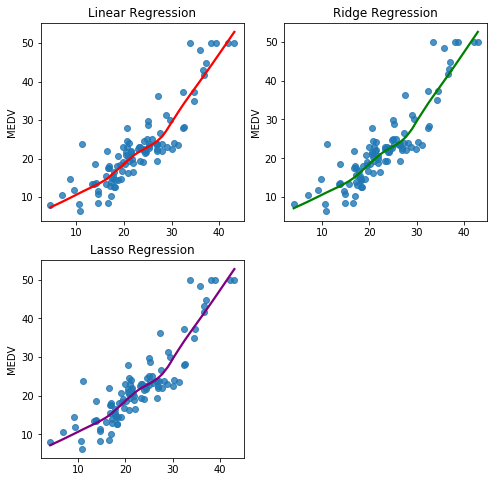

In [225]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
sns.regplot(x=y_pred, y=y_test, lowess=True, line_kws={'color':'red'})
plt.title('Linear Regression')

plt.subplot(2,2,2)
sns.regplot(x=ridge_pred, y=y_test, lowess=True, line_kws={'color':'green'})
plt.title('Ridge Regression')

plt.subplot(2,2,3)
sns.regplot(x=las_pred, y=y_test, lowess=True, line_kws={'color':'purple'})
plt.title('Lasso Regression')